In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import math
import matplotlib
import seaborn as sns

#read data and store data in dataframe titled sg_used_car 
df=pd.read_csv('SG_Usedcar1.csv')

In [2]:
# 计算每个品牌的数量
brand_counts = df['Brand_name'].value_counts()

# 找出数量小于30的品牌
brands_to_replace = brand_counts[brand_counts < 30].index

# 将这些品牌的标签替换为'其他'
df['Brand_name'] = df['Brand_name'].replace(brands_to_replace, 'Other')

df['Brand_name'].value_counts()

# 对 'Brand_name' 列进行独热编码
brand_dummies = pd.get_dummies(df['Brand_name'])

# 将独热编码后的数据合并回原始DataFrame
df = pd.concat([df, brand_dummies], axis=1)

# 打印新增加的列的名称
print(brand_dummies.columns)

Index(['Audi', 'BMW', 'Honda', 'Hyundai', 'Kia', 'Lexus', 'MINI', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Other', 'Porsche', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')


In [3]:
df1=df[['Price','Dep', 'Mileage', 'Road Tax',
       'Dereg Value', 'COE', 'Engine Cap', 'Curb Weight', 'Manufactured',
        'OMV', 'ARF', 'Power', 'No. of Owners',
       'Coe_left_months']]

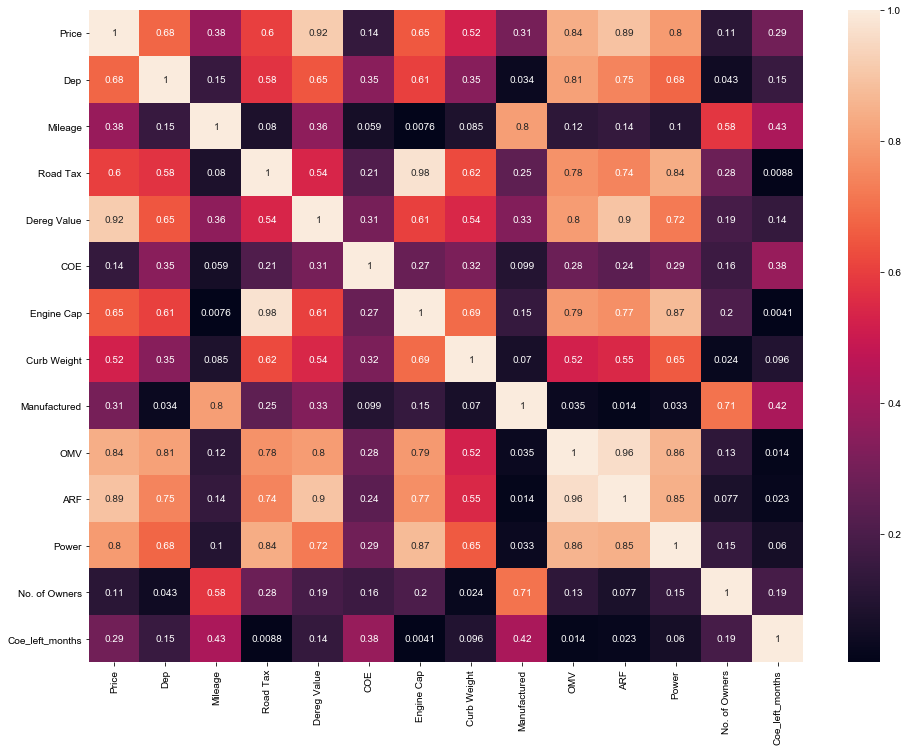

In [4]:
df1.corr()

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.figure(figsize=(16,12))
sns.heatmap(np.abs(df1.corr()),annot = True)
plt.show()


主要影响因素探究
回归树

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 假设原始DataFrame为df，现在从df中提取特征和目标变量
X = df1.drop('Price', axis=1)  # 删除价格列来创建特征集
y = df1['Price']  # 价格列是目标变量

# 分数据集为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化决策树回归模型
model = DecisionTreeRegressor(criterion='mse', max_depth=None, 
    min_samples_leaf=1, min_samples_split=2, splitter='best')

# 拟合模型
model.fit(x_train, y_train)

# 获取特征的重要性
feature_importances = model.feature_importances_

# 创建特征名称的列表
feature_names = X.columns

*重要性可视化

In [6]:
# 将特征名称和它们的重要性结合在一起
features_and_importances = zip(feature_names, feature_importances)

# 按重要性降序排列
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# 打印降序排列的特征名称和它们的重要性
for feature, importance in sorted_features_and_importances:
    print(f"{feature}: {importance:.3f}")

ARF: 0.517
Dereg Value: 0.357
Dep: 0.050
Coe_left_months: 0.046
Mileage: 0.015
OMV: 0.005
COE: 0.004
Curb Weight: 0.002
Power: 0.002
Engine Cap: 0.001
Manufactured: 0.001
No. of Owners: 0.000
Road Tax: 0.000


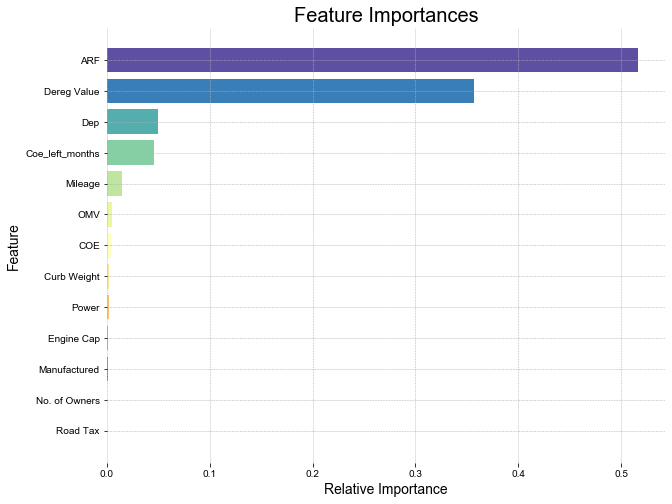

In [7]:
# 创建特征名称的列表
feature_names = X.columns

# 排序特征重要性
indices = np.argsort(feature_importances)[::-1]

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn用于美化图形

# 假设feature_importances和feature_names是已经计算好的特征重要性和对应的特征名

# 创建一个颜色映射对象，这里使用了'Spectral'颜色映射
cmap = plt.get_cmap('Spectral')

# 根据特征重要性生成颜色，重要性越高的特征颜色越暖
colors = [cmap(i) for i in np.linspace(0, 1, len(feature_importances))]

# 排序特征重要性，并获取排序的索引
sorted_idx = np.argsort(feature_importances)

# 创建横向条形图
plt.figure(figsize=(10, 8))
bar_plot = plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], color=colors)

# 为每个条形添加特征名称作为标签
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])

# 添加图形的标题和坐标轴标签
plt.title('Feature Importances', fontsize=20)
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# 添加网格线
plt.grid(True, linestyle='--', linewidth=0.5)

# 移除图形边框
sns.despine(bottom=True, left=True)

# 显示图形
plt.show()


预测价格回归树

主要影响因素探究
相关性

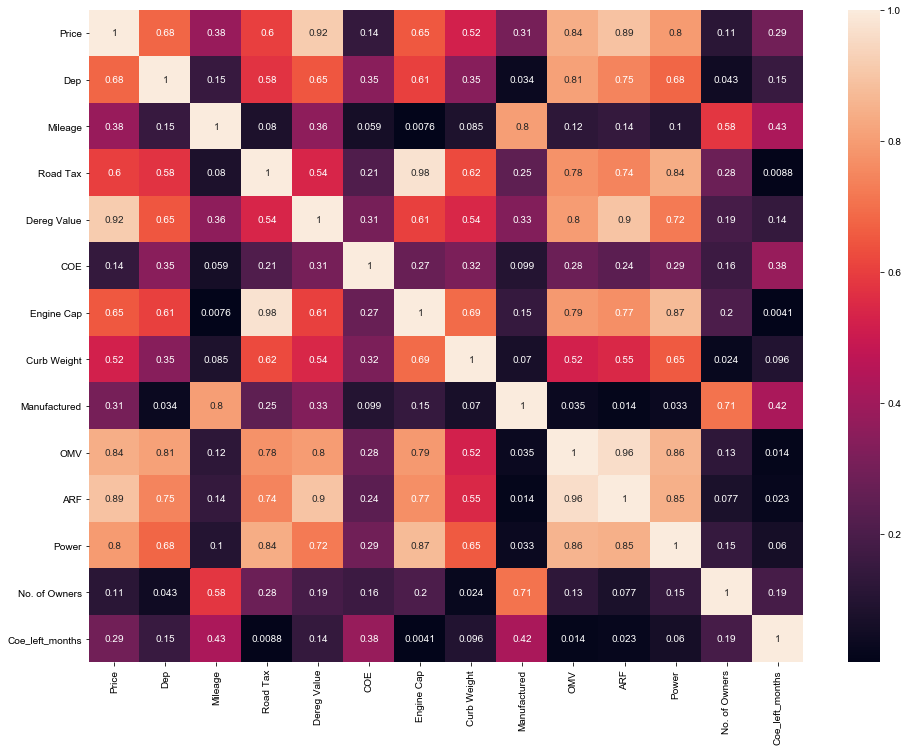

In [8]:
df1.corr()
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.figure(figsize=(16,12))
sns.heatmap(np.abs(df1.corr()),annot = True)
plt.show()

预测价格：探索性尝试，max_depth的影响

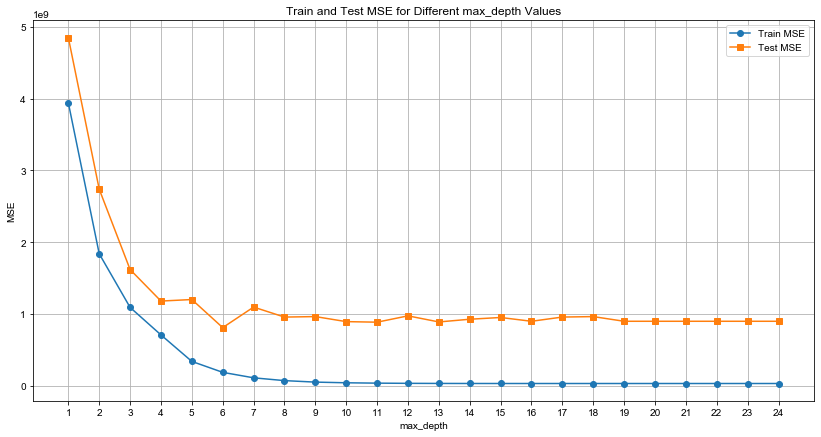

In [9]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 初始化决策树回归模型
model = DecisionTreeRegressor(criterion='mse', max_depth=None, 
    min_samples_leaf=1, min_samples_split=2, splitter='best')

# 拟合模型
model.fit(x_train, y_train)


# 存储不同 max_depth 的 MSE
train_mse_list = []
test_mse_list = []

# 尝试 max_depth 从 1 到 24
for depth in range(1, 25):
    # 初始化模型
    model = DecisionTreeRegressor(
        criterion='mse',
        max_depth=depth,
        min_samples_split=2,
        min_samples_leaf=2,
        random_state=42  # 设置一个固定的随机状态以便复现结果
    )
    
    # 拟合模型
    model.fit(x_train, y_train)
    
    # 在训练集上进行预测
    y_train_pred = model.predict(x_train)
    
    # 在测试集上进行预测
    y_test_pred = model.predict(x_test)
    
    # 计算 MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # 将 MSE 添加到列表中
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# 绘制折线图
plt.figure(figsize=(14, 7))

plt.plot(range(1, 25), train_mse_list, label='Train MSE', marker='o')
plt.plot(range(1, 25), test_mse_list, label='Test MSE', marker='s')

plt.title('Train and Test MSE for Different max_depth Values')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(np.arange(1, 25, step=1))  # 设置 x 轴刻度
plt.legend()
plt.grid(True)

# 显示图表
plt.show()


最佳参数选择：Gridsearch CV

In [10]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# 假设原始DataFrame为df，现在从df中提取特征和目标变量
X = df1[['Dep', 'Dereg Value', 
        'COE', 'Mileage',
         'ARF', 'Coe_left_months']]
y = df1['Price']  # 价格列是目标变量

# 分割数据集为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 设置参数网格
param_grid = {
    'max_depth': [3, 5, 7, 24],  # 限制树的最大深度
    'min_samples_leaf': [1, 2, 4],  # 增加叶节点所需的最小样本数
    'min_samples_split': [2, 5, 10]  # 增加分裂所需的最小样本数
}

# 初始化网格搜索
grid_search = GridSearchCV(DecisionTreeRegressor(criterion='mse'), 
                           param_grid, cv=5, scoring='neg_mean_squared_error')

# 在训练数据上执行网格搜索
grid_search.fit(x_train, y_train)

# 找到最佳参数
best_params = grid_search.best_params_

# 使用最佳参数创建新的模型
model = DecisionTreeRegressor(**best_params)

# 重新训练模型
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=24, min_samples_leaf=2)

MSE

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# 在训练集上进行预测
y_train_pred = model.predict(x_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)

# 计算训练集和测试集的MSE和R²
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 输出结果
print(f"Train MSE:{train_mse:.3f}")
print(f"Test MSE:{test_mse:.3f}")
print(f"Train R²:{train_r2:.3f}")
print(f"Test R²:{test_r2:.3f}")

# 计算平均绝对误差（Mean Absolute Deviation, MAD）
mad = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Deviation (MAD):{mad:.2f}")

# 计算平均绝对百分比误差（Mean Absolute Percentage Error, MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE):{mape:.2f}%")


a=train_mse-test_mse
print(f"train_mse-test_mse：train_mse-test_mse':-834695960.76:{ a:.2f}")

# 判断过拟合
if train_mse < test_mse or train_r2 > test_r2:
    print("The model may be overfitting the training data.")
else:
    print("The model does not appear to be overfitting.")

Train MSE:32017901.415
Test MSE:898749452.125
Train R²:0.996
Test R²:0.922
Mean Absolute Deviation (MAD):9126.40
Mean Absolute Percentage Error (MAPE):6.52%
train_mse-test_mse：train_mse-test_mse':-834695960.76:-866731550.71
The model may be overfitting the training data.


criterion选择：MSE or MAE

MAE

In [12]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


# 设置参数网格
param_grid = {
    'max_depth': [3, 5, 7, 24],  # 限制树的最大深度
    'min_samples_leaf': [1, 2, 4],  # 增加叶节点所需的最小样本数
    'min_samples_split': [2, 5, 10]  # 增加分裂所需的最小样本数
}

# 初始化网格搜索
grid_search = GridSearchCV(DecisionTreeRegressor(criterion='mae'), 
                           param_grid, cv=5, scoring='neg_mean_squared_error')

# 在训练数据上执行网格搜索
grid_search.fit(x_train, y_train)

# 找到最佳参数
best_params = grid_search.best_params_

# 使用最佳参数创建新的模型
model = DecisionTreeRegressor(**best_params)

# 重新训练模型
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=24, min_samples_leaf=2)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# 将y_train四舍五入到两位小数
y_train_rounded = y_train.round(2)

# 用四舍五入后的y_train来拟合模型
model.fit(x_train, y_train_rounded)

# 训练决策树模型
model.fit(x_train, y_train)

# 在训练集上进行预测
y_train_pred = model.predict(x_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)

# 计算训练集和测试集的MSE和R²
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 输出结果
print(f"Train MSE:{train_mse:.3f}")
print(f"Test MSE:{test_mse:.3f}")
print(f"Train R²:{train_r2:.3f}")
print(f"Test R²:{test_r2:.3f}")

# 计算平均绝对误差（Mean Absolute Deviation, MAD）
mad = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Deviation (MAD):{mad:.2f}")

# 计算平均绝对百分比误差（Mean Absolute Percentage Error, MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE):{mape:.2f}%")


a=train_mse-test_mse
print(f"train_mse-test_mse':-834695960.76:{ a:.2f}")

# 判断过拟合
if train_mse < test_mse or train_r2 > test_r2:
    print("The model may be overfitting the training data.")
else:
    print("The model does not appear to be overfitting.")

Train MSE:32017401.415
Test MSE:898749452.125
Train R²:0.996
Test R²:0.922
Mean Absolute Deviation (MAD):9096.30
Mean Absolute Percentage Error (MAPE):6.45%
train_mse-test_mse':-834695960.76:-866732050.71
The model may be overfitting the training data.


可视化

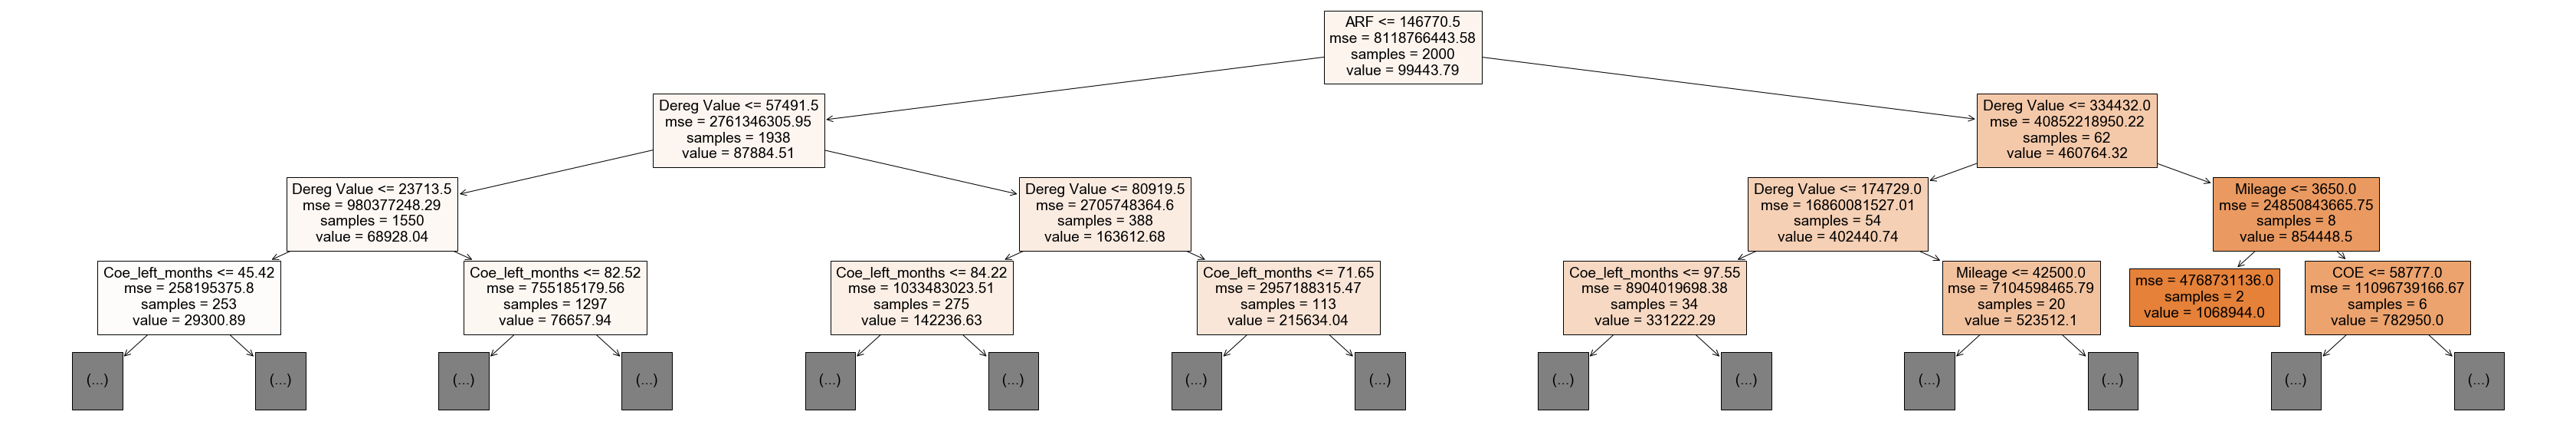

In [14]:
from sklearn.tree import plot_tree

# 可视化决策树
plt.figure(figsize=(60,10))  # 选择一个更合理的大小，例如20x10
plot_tree(model, feature_names=X.columns, filled=True, precision=2, max_depth=3)
plt.show()

线性回归

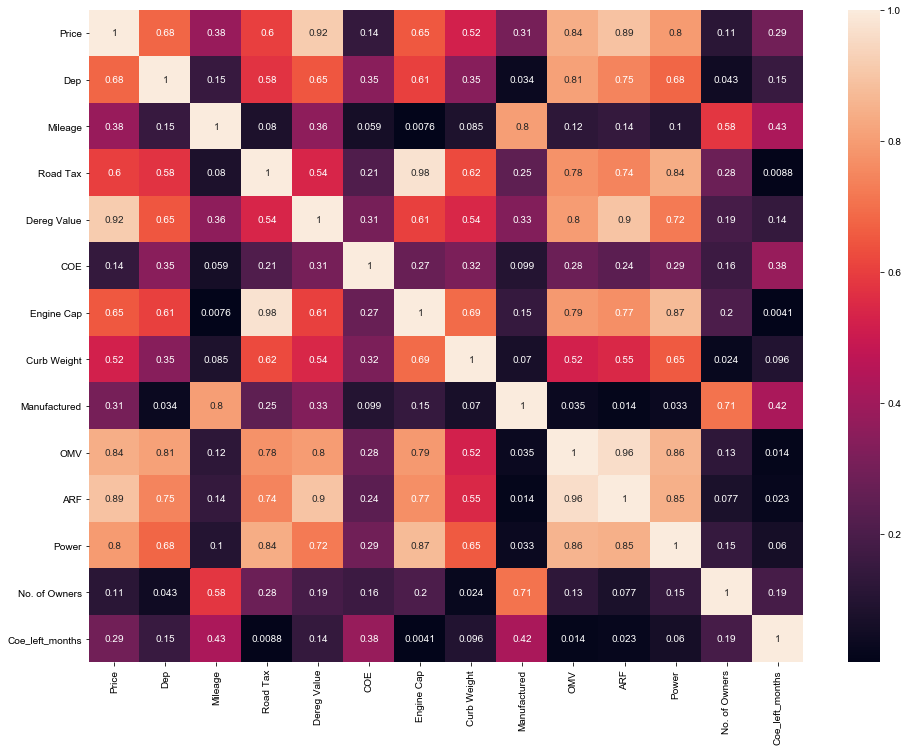

In [15]:
df1.corr()

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.figure(figsize=(16,12))
sns.heatmap(np.abs(df1.corr()),annot = True)
plt.show()

In [16]:
# 计算与 'Price' 的相关性
correlations = df1.corrwith(df1['Price']).sort_values(ascending=False)

# 获取相关性最高的6个列（除去 'Price' 列本身）
top_6_features = correlations[1:7].index.tolist()

# 打印这些列的名称
print("Top 6 features most correlated with 'Price':", top_6_features)

Top 6 features most correlated with 'Price': ['Dereg Value', 'ARF', 'OMV', 'Power', 'Dep', 'Engine Cap']


In [17]:
# 计算与 'Price' 的相关性
correlation_with_price = df1.corr()['Price'].sort_values(ascending=False)

# 保留两位小数
correlation_with_price_rounded = correlation_with_price.round(2)

# 打印保留两位小数的相关性数据
print(correlation_with_price_rounded)

Price              1.00
Dereg Value        0.92
ARF                0.89
OMV                0.84
Power              0.80
Dep                0.68
Engine Cap         0.65
Road Tax           0.60
Curb Weight        0.52
Manufactured       0.31
Coe_left_months    0.29
COE                0.14
No. of Owners     -0.11
Mileage           -0.38
Name: Price, dtype: float64


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

X = df1[ ['Dereg Value', 'ARF', 'OMV', 'Power', 'Dep', 'Engine Cap']]
#X=df1[['Dep', 'Dereg Value', 'COE', 'Mileage', 'ARF', 'Coe_left_months']]
y = df1['Price']

# 分割数据集为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化线性回归模型
linear_reg_model = LinearRegression()

# 拟合模型
linear_reg_model.fit(x_train, y_train)

# 获取系数
coefficients = linear_reg_model.coef_

# 创建一个系数的 DataFrame
coef_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])

# 打印系数
print(coef_df)


             Coefficient
Dereg Value     1.560122
ARF            -0.282244
OMV             0.901894
Power         407.323217
Dep            -0.320623
Engine Cap    -19.279739


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# 在训练集和测试集上进行预测
y_train_pred = linear_reg_model.predict(x_train)
y_test_pred = linear_reg_model.predict(x_test)

# 计算MSE和R²
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 打印评估指标，保留两位小数
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train R²: {train_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")



# 计算平均绝对误差（Mean Absolute Deviation, MAD）
mad = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Deviation (MAD):{mad:.2f}")

# 计算平均绝对百分比误差（Mean Absolute Percentage Error, MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE):{mape:.2f}%")


# 打印线性回归公式，系数保留两位小数
print("Linear Regression model:")
for i, col in enumerate(X.columns):
    print(f"({coefficients[i]:.2f}) * {col}", end="")
    if i < len(X.columns) - 1:
        print(" + ", end="")
print()

from sklearn.metrics import mean_absolute_error

# 计算 MAE
mae = mean_absolute_error(y_test, y_pred)

# 打印 MAE
print(f"mae: {test_r2:.2f}")

Train MSE: 930768419.69
Test MSE: 1040367749.69
Train R²: 0.89
Test R²: 0.91
Mean Absolute Deviation (MAD):9096.30
Mean Absolute Percentage Error (MAPE):6.45%
Linear Regression model:
(1.56) * Dereg Value + (-0.28) * ARF + (0.90) * OMV + (407.32) * Power + (-0.32) * Dep + (-19.28) * Engine Cap
mae: 0.91


In [20]:
# 输出结果
print(f"{train_mse:.3f}")
print(f"{test_mse:.3f}")
print(f"{train_r2:.3f}")
print(f"{test_r2:.3f}")

# 计算平均绝对误差（Mean Absolute Deviation, MAD）
mad = mean_absolute_error(y_test, y_pred)
print(f"{mad:.2f}")

# 计算平均绝对百分比误差（Mean Absolute Percentage Error, MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"{mape:.2f}%")


a=train_mse-test_mse
print(f"{a:.2f}")

# 判断过拟合
if train_mse < test_mse or train_r2 > test_r2:
    print("The model may be overfitting the training data.")
else:
    print("The model does not appear to be overfitting.")


930768419.691
1040367749.685
0.885
0.909
9096.30
6.45%
-109599329.99
The model may be overfitting the training data.


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df1[['Dep', 'Dereg Value', 'COE', 'Mileage', 'ARF', 'Coe_left_months']]

# 计算VIF值
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# VIF公式是 1/(1 - R²)，其中R²是特征在其余特征上的线性回归的决定系数
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# 打印VIF值
print(vif_data)

           feature        VIF
0              Dep   4.342249
1      Dereg Value  18.821393
2              COE   7.789788
3          Mileage   3.107262
4              ARF  13.128983
5  Coe_left_months   4.387853


In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
X = df1[ ['Dereg Value', 'ARF', 'OMV', 'Power', 'Dep', 'Engine Cap']]
#X=df1[['Dep', 'Dereg Value', 'COE', 'Mileage', 'ARF', 'Coe_left_months']]
y = df1['Price']

# 分割数据集为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 初始化岭回归模型
ridge_reg = Ridge()

# 可以使用网格搜索来找到最佳的正则化系数（alpha）
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 设置网格搜索
ridge_grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# 在训练数据上执行网格搜索
ridge_grid_search.fit(x_train, y_train)

# 找到最佳参数
best_alpha = ridge_grid_search.best_params_['alpha']

# 使用最佳参数创建新的岭回归模型
best_ridge_reg = Ridge(alpha=best_alpha)

# 拟合模型
best_ridge_reg.fit(x_train, y_train)

# 评估模型
y_pred = best_ridge_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [26]:
# 输出结果
print(f"{train_mse:.3f}")
print(f"{test_mse:.3f}")
print(f"{train_r2:.3f}")
print(f"{test_r2:.3f}")

# 计算平均绝对误差（Mean Absolute Deviation, MAD）
mad = mean_absolute_error(y_test, y_pred)
print(f"{mad:.2f}")

# 计算平均绝对百分比误差（Mean Absolute Percentage Error, MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"{mape:.2f}%")


a=train_mse-test_mse
print(f"{a:.2f}")

# 判断过拟合
if train_mse < test_mse or train_r2 > test_r2:
    print("The model may be overfitting the training data.")
else:
    print("The model does not appear to be overfitting.")


930768419.691
1040367749.685
0.885
0.909
20831.55
21.97%
-109599329.99
The model may be overfitting the training data.


In [27]:
# Coefficients of the model, rounded to 2 decimal places
coefficients = np.round(best_ridge_reg.coef_, 2)

# Printing the ridge regression equation in the specified format
print("Ridge Regression model:")
for i, col in enumerate(X.columns):
    print(f"({coefficients[i]:.2f}) * {col}", end="")
    if i < len(X.columns) - 1:
        print(" + ", end="")
print(f" + ({best_ridge_reg.intercept_:.2f})")

Ridge Regression model:
(1.56) * Dereg Value + (-0.28) * ARF + (0.90) * OMV + (407.32) * Power + (-0.32) * Dep + (-19.28) * Engine Cap + (-7177.73)
